# Neural Network
## Name: Nguyen Anh Hoang Phuc

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# Evaluation index
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

## MNIST dataset
The MNIST dataset is used to validate the scratch neural network. You can download it from various libraries and websites, but here we use Keras, a deep learning framework. The following code will download the dataset and extract it for you.

<< What is MNIST? 》

This is a standard data set for image classification and handwritten number recognition. This dataset contains 60,000 training and 10,000 test 28x28 pixel black and white images, and labels for which numbers are from 0 to 9.

<< What is image data? 》

A digital image is a collection of points, called pixels. Generally, for black and white images, pixels contain values from 0 to 255. On the other hand, if it is a color image, the values of 0 to 255 corresponding to R (red), G (green), and B (blue) are included. In machine learning, each value from 0 to 255 is treated as a feature quantity. Since 0 to 255 is the range that can be represented by an unsigned 8-bit integer, NumPy can be stored as a "uint8" type variable.

In [3]:
# Code to download the dataset
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Check the dataset
Let's see what kind of data it is.

In [4]:
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
# print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8


## Smoothing
Each image of (1, 28, 28) is transformed into (1, 784). This is the form that we will use in the machine learning methods we have learned so far, and in the neural network we will use in this article, which is a fully coupled layer only. The fact that all pixels are in a single row is described as flatten.

In [5]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
print(X_train.shape) 
print(X_test.shape)

(60000, 784)
(10000, 784)


<< Supplement >>

So far in our study of machine learning, we have referred to the number of features as "dimensions". From that point of view, MNIST is 784 dimensions of data. On the other hand, the state that NumPy's shape is (784,) is also called 1D array. If the shape is (28, 28) which has information of height and width as an image, it is 2 dimensional array. From this point of view, it is two-dimensional data. If it is a colour image, then it is (28, 28, 3), which is a 3D array. From the previous point of view, it is a 3-dimensional data. However, from the point of view of a flat image, whether in black and white or colour, it is not three-dimensional data, it is two-dimensional data. Note that when dealing with image data, the word "dimension" is used in this way with multiple connotations.

## Visualization of image data
Visualize the image data. Let's useplt.imshow.

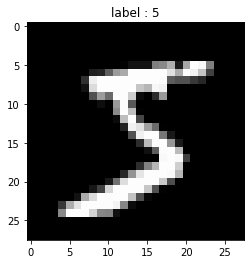

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

<< Developmental topics >>

Image data is usually held as an unsigned 8-bit integer of type uint8, butplt.imshowcan display a more flexible array as an image. For example, the following floating point of type float64 with a negative value will not cause an error and will be displayed in exactly the same way as before.

index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # Convert to float type
image -= 105.35 # Intentionally try to create a negative decimal value
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # Check the value

This is because it is designed to automatically convert a value to an integer from 0 to 255 for processing. Even if it is a uint8 type, if the minimum value is 0 and the maximum value is not 255, the hue will be strange. To prevent this, enter the argument as follows.

plt.imshow(image, 'gray', vmin = 0, vmax = 255)

This automatic scaling can produce unexpected results in image-related libraries, so be sure to check when using the new method.

## Preprocessing
An image is represented by a uint8 type of 0 to 255, but in machine learning it will be handled as a float type of 0 to 1. It can be converted with the following code.

In [7]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


Also, the correct label is an integer between 0 and 9, which is converted to one-hot expression for multi-class classification in neural networks. scikit-learn'sOneHotEncoderis used in the code below. The value in this one-hot representation is treated as a float because it indicates the probability of being that label.

In [8]:
# Split into training data and validation data
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 784)
(12000, 784)


In [9]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_val_one_hot = enc.transform(y_val[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(48000,)
(48000, 10)
float64


In addition, divide 20% of the 60,000 training data as verification data. The training data will be 48,000 and the verification data will be 12,000.

## Scratch Neural Network

We will create a class of neural network from scratch. We will implement the algorithm using only the minimum library such as NumPy.

This time, we will create a three-layer neural network for multi-class classification. Learn the basics of neural networks after fixing the number of layers. In the next Sprint, we will make the design that layers can be changed freely.

Below is a template. Add code to this ScratchSimpleNeuralNetrowkClassifier class.

In [10]:
class ScratchSimpleNeuralNetrowkClassifier():
    """
    Simple three-layer neural network classifier
    Parameters
    ----------
    Attributes
    ----------
    """
    def __init__(self, n_epoch=50, n_features=784, n_nodes1=400, n_nodes2=200, n_output=10, sigma=0.01, n_batch=20, activate_function_key='tanh', lr=0.01, verbose = False):
        
        self.n_epoch = n_epoch
        self.n_features = n_features
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.n_output = n_output
        self.sigma = sigma
        self.n_batch = n_batch
        self.activate_function_key = activate_function_key
        self.lr = lr
        self.verbose = verbose

    def initial_weight(self):
        self.W1 = self.sigma * np.random.randn(self.n_features, self.n_nodes1)
        self.b1 = np.zeros(self.n_nodes1)
        self.W2 = self.sigma * np.random.randn(self.n_nodes1, self.n_nodes2)
        self.b2 = np.zeros(self.n_nodes2)
        self.W3 = self.sigma * np.random.randn(self.n_nodes2, self.n_output)
        self.b3 = np.zeros(self.n_output)

    def activation_function(self, X):
        if self.activate_function_key == 'sigmoid':
            return 1/(1+np.exp(-X))
        elif self.activate_function_key == 'tanh':
            return np.tanh(X)

    def softmax(self, X):
        return np.exp(X-np.max(X))/np.sum(np.exp(X-np.max(X)), axis=1, keepdims=True)

    # Problem 3
    def loss_function(self,y,yt):
        delta = 1e-2
        return -np.mean(yt*np.log(y+delta))

    def gradient_descent(self,X,y,yt):

        # 3rd layer
        delta_a3 = (y-yt)/self.n_batch
        delta_b3 = np.sum(delta_a3, axis=0)
        delta_W3 = np.dot(self.z2.T,delta_a3)
        delta_z2 = np.dot(delta_a3, self.W3.T)

        self.W3 -= self.lr*delta_W3 
        self.b3 -= self.lr*delta_b3 

        # 2nd layer
        if self.activate_function_key == 'sigmoid':
            delta_a2 = delta_z2*(1-self.activation_function(self.z2))*self.activation_function(self.z2)

        elif self.activate_function_key == 'tanh':
            delta_a2 = delta_z2*(1-np.tanh(self.z2)**2)
        
        delta_b2 = np.sum(delta_a2, axis=0)
        delta_W2 = np.dot(self.z1.T, delta_a2)
        delta_z1 = np.dot(delta_a2, self.W2.T)

        self.W2 -= self.lr*delta_W2 
        self.b2 -= self.lr*delta_b2 

        # 1st layer
        if self.activate_function_key == 'sigmoid':
            delta_a1 = delta_z1*(1-self.activation_function(self.z1))*self.activation_function(self.z1)

        elif self.activate_function_key == 'tanh':
            delta_a1 = delta_z1*(1-np.tanh(self.z1)**2)

        delta_b1 = np.sum(delta_a1, axis=0)
        delta_W1 = np.dot(X.T, delta_a1)

        self.W1 -= self.lr*delta_W1 
        self.b1 -= self.lr*delta_b1 
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn a neural network classifier.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : The following forms of ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """
        # Initialize weights
        self.initial_weight()

        # List to record the loss_function for each epoch
        self.log_loss = []
        self.log_loss_val = []
        
        # Evaluate the estimation of Train data per epoch: Accuracy
        self.log_acc = []
        self.log_acc_val = []

        for epoch in range(self.n_epoch):
            # Mini-batch processing
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.n_batch)

            self.loss = 0
            self.true_y = np.array([])
            self.pred_y = np.array([])

            for mini_X_train, mini_y_train in get_mini_batch:

                # 1st layer
                self.z1 = self.activation_function(np.dot(mini_X_train, self.W1) + self.b1)

                # 2nd layer
                self.z2 = self.activation_function(np.dot(self.z1, self.W2) + self.b2)

                # 3rd layer (softmax function)
                yhat = self.softmax(np.dot(self.z2, self.W3) + self.b3)

                # Backpropagation (stochastic gradient descent method)
                self.gradient_descent(mini_X_train, yhat, mini_y_train)

                # Record correct and estimated values for mini-batch data
                self.true_y = np.concatenate([self.true_y, np.argmax(mini_y_train, axis=1)])
                self.pred_y = np.concatenate([self.pred_y, np.argmax(yhat, axis=1)])

                # Loss function
                self.loss += self.loss_function(yhat, mini_y_train)

            # Record the loss function for each epoch
            self.log_loss.append(self.loss/len(get_mini_batch))

            # Accuracy
            acc = accuracy_score(self.true_y, self.pred_y)
            self.log_acc.append(acc)

            # Calculate once Val data has been entered
            if (type(X_val) != bool):
                # 1st layer
                self.z1_val = self.activation_function(np.dot(X_val, self.W1) + self.b1)

                # 2nd layer
                self.z2_val = self.activation_function(np.dot(self.z1_val, self.W2) + self.b2)

                # 3rd layer (softmax function)
                yhat_val = self.softmax(np.dot(self.z2_val, self.W3) + self.b3)

                # Loss function
                self.loss_val = self.loss_function(yhat_val, y_val)
                self.log_loss_val.append(self.loss_val)

                # Accuracy
                acc_val = accuracy_score(np.argmax(y_val, axis=1), np.argmax(yhat_val,axis=1))
                self.log_acc_val.append(acc_val)

            # When verbose is set to true, output the learning process and other information
            if self.verbose:
                print("epoch:{:>3} loss:{:>8,.3f} acc:{:>5,.3f}".format(epoch, self.loss/self.n_batch, acc))

    def predict(self, X):
        """
        Estimate using a neural network classifier.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result
        """
        # 1st layer
        self.pred_z1 = self.activation_function(np.dot(X, self.W1) + self.b1)

        # 2nd layer
        self.pred_z2 = self.activation_function(np.dot(self.pred_z1, self.W2) + self.b2)

        return np.argmax(np.dot(self.pred_z2, self.W3) + self.b3, axis=1)

### Mini batch processing
In the past, machine learning scratch computed all samples at once. In neural networks, however, it is common to use stochastic gradient descent, where the data is input in chunks. A batch of data is called a mini-batch and the number of samples is called the batch size.​

In this case, the batch size is 20. The training data we will use is 48000, so 48000 / 20 means 2400 iterations. In neural networks, this is called 2400 iteration Once all the training data has been viewed, one epoch has been completed. Repeating this epoch several times completes the learning process.

We have prepared a simple iterator to achieve this. You can get a mini-batch by calling it with a for statement.

In [11]:
class GetMiniBatch:
    """
Iterator to get a mini-batch
    Parameters
    ----------
    X : The following forms of ndarray, shape (n_samples, n_features)
      Training data 
    y : The following form of ndarray, shape (n_samples, 1)
      Correct answer value
    batch_size : int
      Batch size
    seed : int
      NumPy random number seed
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

Mini-batch can be retrieved by instantiating this class and using the for statement.

In [12]:
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)
print(len(get_mini_batch)) # 2400
print(get_mini_batch[5]) # You can get the 5th mini batch
for mini_X_train, mini_y_train in get_mini_batch:
    # You can use a mini batch in this for statement
    pass

2400
(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([8, 9, 6, 2, 1, 8, 5, 3, 3, 3, 2, 1, 5, 6, 5, 5, 1, 1, 6, 1],
      dtype=uint8))


## Problem 1 Creating a code to determine the initial weight value

Write the code that determines the initial weights for each layer of the neural network.

Various methods have been proposed for the initial value of the weight, but this time we will perform a simple initialization using a Gaussian distribution. The same is true for bias.

Please refer to the code below. The standard deviation value sigma is a hyperparameter. The evolutionary weight initialization method will be covered in the next Sprint.

In [13]:
n_features = 784
n_nodes1 = 400
n_nodes2 = 200
n_output = 10

# Standard deviation of Gaussian distribution
sigma = 0.01 # Standard deviation of Gaussian distribution
W1 = sigma * np.random.randn(n_features, n_nodes1)
print("W1", W1.shape)


W1 (784, 400)


In [14]:
W1 = sigma * np.random.randn(n_features, n_nodes1)
b1 = sigma * np.random.randn(n_nodes1)
W2 = sigma * np.random.randn(n_nodes1, n_nodes2)
b2 = sigma * np.random.randn(n_nodes2)
W3 = sigma * np.random.randn(n_nodes2, n_output)
b3 = sigma * np.random.randn(n_output)

print('W1', W1.shape)
print('W2', W2.shape)
print('W3', W3.shape)
print('b1', b1.shape)
print('b2', b2.shape)
print('b3', b3.shape)

W1 (784, 400)
W2 (400, 200)
W3 (200, 10)
b1 (400,)
b2 (200,)
b3 (10,)


## Problem 2 Implementation of forward propagation

Please create a three layer neural network Forward propagation. In the following explanation, the number of nodes is 400 for the first layer and 200 for the second layer, but you can change it.

The formulas for each layer are shown below. This time, it also describes what kind of ndarray shape the array represented by each symbol has in the implementation.

batch_size = 20 # batch size n_features = 784 # number of features n_nodes1 = 400 # number of nodes in the first layer n_nodes2 = 200 # number of nodes in the second layer n_output = 10 # number of output classes (number of nodes in the third layer)

"First layer"

$A_1 = X \cdot W_1 + B_1$

$X$: Feature vector (batch_size, n_features)

$W_1$: Weight of the 1st layer (n_features, n_nodes1)

$B_1$ : First layer bias (n_nodes1,)

$A_1$ : 出力 (batch_size, n_nodes1)

"First layer activation function"

$Z_1 = f(A_1)$

$f()$ : Activation function

$Z_1$ 出力 (batch_size, n_nodes1)

"Second layer"

$A_2 = Z_1 \cdot W_2 + B_2$
$W_2$ : Weight of the second layer (n_nodes1, n_nodes2)

$B_2$ : Second layer bias (n_nodes2,)

$A_2$ : 出力 (batch_size, n_nodes2)

"Activation function of the second layer"

$Z_2 = f(A_2)$

$f()$ : Activation function

$Z_2$ 出力 (batch_size, n_nodes2)

"Third layer (output layer)"

$A_3 = Z_2 \cdot W_3 + B_3$

$W_3$ : Weight of 3rd layer (n_nodes2, n_output)

$B_3$ : Third layer bias (n_output,)

$A_3$ : 出力 (batch_size, n_output)

"3rd layer activation function"

$Z_3 = softmax(A_3)$

$softmax()$ : Softmax Functions

$Z_3$ 出力 (batch_size, n_output)

$Z_3$ is an array of probabilities for each label (0-9).

## Activation function (forward propagation)

Create an activation function and use it in forward propagation. It is recommended to implement it so that it can be switched, but either one is acceptable.

"Sigmoid function"

$f(Z) = sigmoid(A) = \frac{1}{1+exp(-A)}$

Please use np.expto calculate the exponential function $exp(-A)$.

numpy.exp — NumPy v1.15 Manual

"Hyperbolic tangent function"

The following formula can be realized with a singlenp.tanh.

$f(Z) = tanh(A) = \frac{exp(A) - exp(-A)}{exp(A) + exp(-A)}$

numpy.tanh — NumPy v1.15 Manual

* Currently, an activation function called ReLU is commonly used instead of these. We will handle it in the next Sprint.

## Softmax Functions

Create a softmax function and use it in forward propagation. This is another type of activation function, but it is often treated differently due to its characteristics used in the output layer of multiclass classification.

The following formula.

$Z_{3\_k} = \frac{exp(A_{3\_k})}{\sum_{i=1}^{n_c}exp(A_{3\_i})}$

$Z_{3_k}$ : $k$ 番目のクラスの確率ベクトル (batch_size,)

$A_{3_k}$ : $k$ 番目のクラスにあたる前の層からのベクトル (batch_size,)

$n_c$ : Number of classes, n_output. 10 this time in MNIST.

The denominator is the sum of the values corresponding to all the classes, passed through an exponential function and added together. By adding the $k$-th class to the numerator, we get the probability of being in the $k$-th class.

This is calculated for 10 classes and the total is $Z_3$.

In [15]:
X = X_train[0:20]

In [16]:
# Linear combination of the first layer
z1 = np.dot(X, W1)# + b1
print('z1.shape:',z1.shape)
print(z1)

z1.shape: (20, 400)
[[ 0.01726377  0.24959539 -0.00090486 ... -0.11895395  0.02433224
  -0.01710371]
 [-0.03537372 -0.01585472 -0.12599816 ...  0.02110951  0.14705574
  -0.05120773]
 [-0.00691534  0.00082173  0.0553473  ...  0.02658268  0.07354469
  -0.07670579]
 ...
 [ 0.12311126  0.3123251  -0.15401248 ...  0.03446554  0.09595977
  -0.10323892]
 [-0.05107819  0.1394379   0.06252366 ...  0.07813688  0.1712076
  -0.02469945]
 [-0.0410895   0.20205106 -0.07244536 ...  0.02632704 -0.02146239
  -0.12187226]]


In [17]:
# Activation function for the first layer
sig1 = 1/(1+np.exp(-z1))
print('sig1.shape: ', sig1.shape)
print(sig1)

sig1.shape:  (20, 400)
[[0.50431584 0.56207691 0.49977379 ... 0.47029653 0.50608276 0.49572418]
 [0.49115749 0.4960364  0.46854207 ... 0.50527718 0.53669782 0.48720086]
 [0.49827117 0.50020543 0.51383329 ... 0.50664528 0.51837789 0.48083295]
 ...
 [0.530739   0.57745269 0.46157281 ... 0.50861553 0.52397155 0.47421317]
 [0.48723323 0.5348031  0.51562583 ... 0.51952429 0.54269765 0.49382545]
 [0.48972907 0.55034162 0.48189658 ... 0.50658138 0.49463461 0.46956959]]


In [18]:
# linear combination of the second layer
z2 = np.dot(sig1,W2) + b2
print('z2.shape:', z2.shape)
print(z2)

z2.shape: (20, 200)
[[-0.06398452  0.07865752 -0.05257785 ... -0.06549845  0.03798556
   0.03635726]
 [-0.06209917  0.07613876 -0.04820547 ... -0.07262522  0.03587556
   0.02707247]
 [-0.0619193   0.07796398 -0.05931515 ... -0.06820489  0.0400085
   0.03132949]
 ...
 [-0.06324769  0.07682693 -0.04927869 ... -0.06703631  0.04000471
   0.03927177]
 [-0.06305293  0.08260109 -0.05048111 ... -0.07013116  0.03806604
   0.03747311]
 [-0.06416829  0.07743086 -0.05429856 ... -0.06259694  0.03739517
   0.02963351]]


In [19]:
# Activation function for the first layer
sig2 = 1/(1+np.exp(-z2))
print('sig1.shape: ', sig2.shape)
print(sig2)

sig1.shape:  (20, 200)
[[0.48400933 0.51965425 0.48685856 ... 0.48363124 0.50949525 0.50908831]
 [0.48448019 0.5190255  0.48795097 ... 0.48185167 0.50896793 0.5067677 ]
 [0.48452512 0.51948113 0.48517556 ... 0.48295538 0.51000079 0.50783173]
 ...
 [0.48419335 0.51919729 0.48768282 ... 0.4832472  0.50999984 0.50981668]
 [0.48424199 0.52063854 0.4873824  ... 0.48247439 0.50951536 0.50936718]
 [0.48396343 0.51934805 0.48642869 ... 0.48435587 0.5093477  0.50740784]]


In [20]:
# 3rd layer linear combination 
z3 = np.dot(sig2,W3) + b3
print('z3.shape:', z3.shape)
print(z3)

z3.shape: (20, 10)
[[-0.03845385 -0.07044272 -0.02064937  0.06659356  0.15819092 -0.22290107
   0.00595353 -0.0262492   0.05377046 -0.13206253]
 [-0.03848945 -0.07066892 -0.02062665  0.06686892  0.15804357 -0.22305082
   0.00611663 -0.02594557  0.05389177 -0.13222362]
 [-0.03837838 -0.07041106 -0.02083022  0.06676074  0.15793865 -0.22296549
   0.0059666  -0.02614887  0.05380383 -0.13223348]
 [-0.03815222 -0.07072144 -0.02088484  0.06652823  0.15807435 -0.22297022
   0.00561122 -0.02616645  0.05367228 -0.13216059]
 [-0.0384682  -0.07046868 -0.02092447  0.06672885  0.15831623 -0.22307903
   0.00580742 -0.02619892  0.05387494 -0.13228911]
 [-0.03822659 -0.07026003 -0.0211061   0.06671082  0.15795651 -0.2229461
   0.00574529 -0.02608631  0.0539068  -0.13224409]
 [-0.03824237 -0.07044862 -0.0204691   0.06671937  0.15862118 -0.22311461
   0.00571222 -0.02622872  0.05393262 -0.13221937]
 [-0.03848452 -0.07059761 -0.0209168   0.06687152  0.15807588 -0.22299176
   0.0059946  -0.02610655  0.0538

In [21]:
# 3rd layer activation function (softmax function)
sfmax = np.zeros([len(X),10])
for i in range(20):
    sfmax[i] = np.exp(z3[i])/np.sum(np.exp(z3[i]), axis=0)
print('sfmax.shape: ', sfmax.shape)
print(sfmax)
print(np.sum(sfmax))

sfmax.shape:  (20, 10)
[[0.09793305 0.09484986 0.09969231 0.10878044 0.11921503 0.08143758
  0.10238001 0.09913561 0.10739444 0.08918166]
 [0.09792731 0.09482623 0.09969229 0.10880789 0.11919473 0.08142352
  0.10239435 0.09916344 0.107405   0.08916525]
 [0.0979429  0.09485525 0.09967679 0.10880136 0.11918796 0.08143438
  0.10238392 0.09914805 0.10740072 0.08916866]
 [0.09797172 0.09483226 0.09967812 0.10878346 0.11921224 0.08143954
  0.1023545  0.09915305 0.1073939  0.08918122]
 [0.09793508 0.09485073 0.09966839 0.10879897 0.11923416 0.08142595
  0.10236864 0.09914408 0.10740943 0.08916458]
 [0.0979584  0.09487018 0.09964993 0.10879662 0.11919085 0.08143648
  0.10236192 0.09915489 0.10741247 0.08916828]
 [0.09794725 0.094843   0.09970366 0.10878689 0.11925841 0.08141478
  0.1023485  0.09913105 0.10740472 0.08916175]
 [0.09793176 0.09483683 0.0996674  0.10881258 0.1192034  0.08143162
  0.102386   0.09915149 0.10740546 0.08917346]
 [0.09794335 0.09481715 0.09967394 0.10879906 0.11921339 

In [22]:
# Calculate without a for statement
softmax = np.exp(z3).T/np.sum(np.exp(z3),axis=1)
print('softmax.shape:', softmax.shape)
print(softmax.T)
print(np.sum(softmax))

softmax.shape: (10, 20)
[[0.09793305 0.09484986 0.09969231 0.10878044 0.11921503 0.08143758
  0.10238001 0.09913561 0.10739444 0.08918166]
 [0.09792731 0.09482623 0.09969229 0.10880789 0.11919473 0.08142352
  0.10239435 0.09916344 0.107405   0.08916525]
 [0.0979429  0.09485525 0.09967679 0.10880136 0.11918796 0.08143438
  0.10238392 0.09914805 0.10740072 0.08916866]
 [0.09797172 0.09483226 0.09967812 0.10878346 0.11921224 0.08143954
  0.1023545  0.09915305 0.1073939  0.08918122]
 [0.09793508 0.09485073 0.09966839 0.10879897 0.11923416 0.08142595
  0.10236864 0.09914408 0.10740943 0.08916458]
 [0.0979584  0.09487018 0.09964993 0.10879662 0.11919085 0.08143648
  0.10236192 0.09915489 0.10741247 0.08916828]
 [0.09794725 0.094843   0.09970366 0.10878689 0.11925841 0.08141478
  0.1023485  0.09913105 0.10740472 0.08916175]
 [0.09793176 0.09483683 0.0996674  0.10881258 0.1192034  0.08143162
  0.102386   0.09915149 0.10740546 0.08917346]
 [0.09794335 0.09481715 0.09967394 0.10879906 0.11921339

In [23]:
# without a for statement - part2
softmax = np.exp(z3)/np.sum(np.exp(z3),axis=1, keepdims=True)
print('softmax.shape:', softmax.shape)
print(softmax.T)
print(np.sum(softmax))

softmax.shape: (20, 10)
[[0.09793305 0.09792731 0.0979429  0.09797172 0.09793508 0.0979584
  0.09794725 0.09793176 0.09794335 0.09795231 0.0979581  0.09794044
  0.09793979 0.09794196 0.0979438  0.09795298 0.09793577 0.09794292
  0.09794795 0.09795013]
 [0.09484986 0.09482623 0.09485525 0.09483226 0.09485073 0.09487018
  0.094843   0.09483683 0.09481715 0.09484351 0.09484127 0.0948432
  0.0948453  0.09484761 0.09482565 0.09485499 0.09484977 0.09485301
  0.09483724 0.09485306]
 [0.09969231 0.09969229 0.09967679 0.09967812 0.09966839 0.09964993
  0.09970366 0.0996674  0.09967394 0.09966443 0.09969621 0.09967296
  0.09967957 0.0996816  0.09966752 0.0996788  0.09968312 0.09967404
  0.09968961 0.09968573]
 [0.10878044 0.10880789 0.10880136 0.10878346 0.10879897 0.10879662
  0.10878689 0.10881258 0.10879906 0.10880854 0.1087776  0.10880139
  0.10879765 0.10881816 0.10879875 0.10879659 0.10881316 0.10880076
  0.10878596 0.10880114]
 [0.11921503 0.11919473 0.11918796 0.11921224 0.11923416 0.119

In [24]:
# High parabolic tangent
np.tanh(z1)

array([[ 0.01726206,  0.24453829, -0.00090486, ..., -0.11839604,
         0.02432744, -0.01710204],
       [-0.03535897, -0.01585339, -0.1253356 , ...,  0.02110637,
         0.14600478, -0.05116302],
       [-0.00691523,  0.00082173,  0.05529085, ...,  0.02657642,
         0.07341238, -0.0765557 ],
       ...,
       [ 0.12249303,  0.30255085, -0.15280621, ...,  0.0344519 ,
         0.09566631, -0.1028737 ],
       [-0.05103382,  0.13854118,  0.06244232, ...,  0.07797825,
         0.16955417, -0.02469443],
       [-0.04106639,  0.19934568, -0.07231889, ...,  0.02632096,
        -0.02145909, -0.12127244]])

In [25]:
# High parabolic tangent (verification)
(np.exp(z1)-np.exp(-z1))/(np.exp(z1)+np.exp(-z1))

array([[ 0.01726206,  0.24453829, -0.00090486, ..., -0.11839604,
         0.02432744, -0.01710204],
       [-0.03535897, -0.01585339, -0.1253356 , ...,  0.02110637,
         0.14600478, -0.05116302],
       [-0.00691523,  0.00082173,  0.05529085, ...,  0.02657642,
         0.07341238, -0.0765557 ],
       ...,
       [ 0.12249303,  0.30255085, -0.15280621, ...,  0.0344519 ,
         0.09566631, -0.1028737 ],
       [-0.05103382,  0.13854118,  0.06244232, ...,  0.07797825,
         0.16955417, -0.02469443],
       [-0.04106639,  0.19934568, -0.07231889, ...,  0.02632096,
        -0.02145909, -0.12127244]])

## Problem 3 Implementation of cross entropy error

Create the objective function (loss function).

The cross-entropy error $L$, the objective function for multiclass classification, is the following formula:

$L = - \frac{1}{n_b}\sum_{j}^{n_b}\sum_{k}^{n_c}y_{jk} log(z_{3\_jk})$

$y_{ij}$ :Correct answer label for the $k$-th class of the $j$-th sample (scalar of 0 or 1 in one-hot representation)

$z_{3_ij}$ : Probability of the $k$-th class of the $j$-th sample (scalar)

$n_{b}$ : バッチサイズ、batch_size

$n_{c}$ : Number of classes, n_output (10 in this MNIST)

You can find the error per sample.

The range of definition of log(x) for real numbers is0 < xTherefore, if the contents of log are very small, an error occurs. We can avoid the error by adding 1e-7 to log.

In [26]:
y = y_train_one_hot[0:20]
loss = -y*np.log(sfmax)/len(y)
print('shape:\n', loss.shape)
print(loss)

shape:
 (20, 10)
[[0.         0.         0.11528334 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.11155743 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.11395128 0.         0.         0.        ]
 [0.         0.         0.         0.1109198  0.         0.
  0.         0.         0.         0.        ]
 [0.11617252 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.11155395 0.        ]
 [0.         0.         0.         0.         0.         0.12540992
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.12085859]
 [0.         0.         0.         0.         0.10634201 0.
  0.         0.         0.         0.        ]
 [0.        

## Problem 4 Implementation of backpropagation

Create a backpropagation of a three-layer neural network. This is the part that performs stochastic gradient descent.

The formula is shown below.

First, the update formula for the weights and biases of the i-th layer. For $W_i$ and $B_i$, the updated $W_i^{\prime}$ and $B_i^{\prime}$ are obtained by the following formula

$W_i^{\prime} = W_i - \alpha \frac{\partial L}{\partial W_i} \\ B_i^{\prime} = B_i - \alpha \frac{\partial L}{\partial B_i}$

$\alpha$ : Learning rate (can be different for each layer, but basically all the same)）

$\frac{\partial L}{\partial W_i}$ : Gradient of loss $L$ with respect to $W_i$.

$\frac{\partial L}{\partial B_i}$ : Gradient of loss $L$ with respect to $B_i$.

* This slope is considered as the sum or average of the number of samples in the mini-batch. Here we will calculate the total.

This update method is similar to the steepest descent method in Sprint3 linear regression and sprint4 logistic regression. A more effective update method is known and will be covered in the next Sprint.

Backpropagation is done to find the gradients $ \ frac {\ partial L} {\ partial W_i} $ and $ \ frac {\ partial L} {\ partial B_i} $. Here is the formula. An example using the hyperbolic tangent function is shown. The formula for the sigmoid function follows.

"Third layer"

$\frac{\partial L}{\partial A_3} = \frac{1}{n_b}(Z_{3} - Y)\\ \frac{\partial L}{\partial B_3} = \sum_{j}^{n_b}\frac{\partial L}{\partial A_{3\_j}}\\ \frac{\partial L}{\partial W_3} = Z_{2}^{T}\cdot \frac{\partial L}{\partial A_3}\\ \frac{\partial L}{\partial Z_2} = \frac{\partial L}{\partial A_3} \cdot W_3^T$

$\frac{\partial L}{\partial A_3}$ : $A_3$ に関する損失 $L$ の勾配 (batch_size, n_output)

$\frac{\partial L}{\partial A_{3_j}}$ : j番目のサンプルの$A_3$ に関する損失 $L$ の勾配 (n_nodes2,)

$\frac{\partial L}{\partial B_3}$ : $B_3$ に関する損失 $L$ の勾配 (n_output,)

$\frac{\partial L}{\partial W_3}$ : Gradient of loss $L$ with respect to $W_3$ (n_nodes2, n_output)

$\frac{\partial L}{\partial Z_2}$ : $Z_2$ に関する損失 $L$ の勾配 (batch_size, n_nodes2)

$ Z_ {3} $: Softmax function output (batch_size, n_nodes2)

$Y$ : 正解ラベル (batch_size, n_output)

$ Z_ {2} $: Second layer activation function output (batch_size, n_nodes2)

$W_3$ : Weight of 3rd layer (n_nodes2, n_output)

$n_{b}$ : バッチサイズ、batch_size

"Second layer"

$\frac{\partial L}{\partial A_2} = \frac{\partial L}{\partial Z_2} \odot \{1-tanh^2(A_{2})\}\\ \frac{\ partial L}{\partial B_2} = \sum_{j}^{n_b}\frac{\partial L}{\partial A_{2\_j}}\\ \frac{\partial L}{\partial W_2} = Z_{1}^T \cdot \frac{\partial L}{\partial A_2}\\ \frac{\partial L}{\partial Z_1} = \frac{\partial L}{\partial A_2} \cdot W_2 ^T$

$\frac{\partial L}{\partial A_2}$ : $A_2$ に関する損失 $L$ の勾配 (batch_size, n_nodes2)

$\frac{\partial L}{\partial A_{2_j}}$ : j番目のサンプルの$A_2$ に関する損失 $L$ の勾配 (n_nodes2,)

$\frac{\partial L}{\partial B_2}$ : $B_2$ に関する損失 $L$ の勾配 (n_nodes2,)

$\frac{\partial L}{\partial W_2}$ : Gradient of loss $L$ with respect to $W_2$ (n_nodes1, n_nodes2)

$\frac{\partial L}{\partial Z_2}$ : $Z_2$ に関する損失 $L$ の勾配 (batch_size, n_nodes2)

$A_2$ : 2層目の出力 (batch_size, n_nodes2)

$ Z_ {1} $: 1st layer activation function output (batch_size, n_nodes1)

$W_2$ : Weight of the second layer (n_nodes1, n_nodes2)

"First layer"

$\frac{\partial L}{\partial A_1} = \frac{\partial L}{\partial Z_1} \odot \{1-tanh^2(A_{1})\}\\ \frac{\ partial L}{\partial B_1} = \sum_{j}^{n_b}\frac{\partial L}{\partial A_{1\_j}}\\ \frac{\partial L}{\partial W_1} = X^T \cdot \frac{\partial L}{\partial A_1}\\$

$\frac{\partial L}{\partial A_1}$ : $A_1$ に関する損失 $L$ の勾配 (batch_size, n_nodes1)

$\frac{\partial L}{\partial A_{1_j}}$ : j番目のサンプルの$A_1$ に関する損失 $L$ の勾配 (n_nodes1,)

$\frac{\partial L}{\partial B_1}$ : $B_1$ に関する損失 $L$ の勾配 (n_nodes1,)

$\frac{\partial L}{\partial W_1}$ : Gradient of loss $L$ with respect to $W_1$ (n_features, n_nodes1)

$\frac{\partial L}{\partial Z_1}$ : $Z_1$ に関する損失 $L$ の勾配 (batch_size, n_nodes1)

$ A_1 $: First layer output (batch_size, n_nodes1)

$X$: Feature vector (batch_size, n_features)

$W_1$: Weight of the 1st layer (n_features, n_nodes1)

<< Supplement >>

When the sigmoid function is used as the activation function, it becomes as follows.

$\frac{\partial L}{\partial A_2} = \frac{\partial L}{\partial Z_2} \odot \{1-sigmoid(A_{2})\}sigmoid(A_{2}) \\ \frac{\partial L}{\partial A_1} = \frac{\partial L}{\partial Z_1} \odot \{1-sigmoid(A_{1})\}sigmoid(A_{1})$

In [27]:
# 3rd layer
delta_a3 = sfmax-y
delta_b3 = np.sum(delta_a3, axis=0)
delta_W3 = np.dot(z2.T,delta_a3)
delta_z2 = np.dot(delta_a3, W3.T)

In [28]:
print(delta_a3.shape)
print(delta_b3.shape)
print(delta_W3.shape)
print(delta_z2.shape)

(20, 10)
(10,)
(200, 10)
(20, 200)


In [29]:
# 2nd layer
delta_a2 = delta_z2*(1-np.tanh(z2)**2)
delta_b2 = np.sum(delta_a2, axis=0)
delta_W2 = np.dot(z1.T,delta_a2)
delta_z1 = np.dot(delta_a2, W2.T)

In [30]:
print(delta_a2.shape)
print(delta_b2.shape)
print(delta_W2.shape)
print(delta_z1.shape)

(20, 200)
(200,)
(400, 200)
(20, 400)


In [31]:
# 1st layer
delta_a1 = delta_z1*(1-np.tanh(z1)**2)
delta_b1 = np.sum(delta_a1, axis=0)
delta_W1 = np.dot(X.T,delta_a1)

In [32]:
print(delta_a1.shape)
print(delta_b1.shape)
print(delta_W1.shape)

(20, 400)
(400,)
(784, 400)


## Problem 5  Estimation

Create a method for estimating.

Determine which is the highest of the 10 probabilities output by forward propagation.

numpy.argmax — NumPy v1.17 Manual

In [33]:
clf = ScratchSimpleNeuralNetrowkClassifier(n_epoch=50, n_features=784, n_nodes1=400, n_nodes2=200, n_output=10, sigma=0.01, n_batch=100, activate_function_key='tanh', lr=0.01, verbose=True)

clf.fit(X_train, y_train_one_hot, X_val, y_val_one_hot)
y_pred = clf.predict(X_val)

epoch:  0 loss:   1.056 acc:0.215
epoch:  1 loss:   1.030 acc:0.360
epoch:  2 loss:   0.789 acc:0.441
epoch:  3 loss:   0.479 acc:0.661
epoch:  4 loss:   0.338 acc:0.782
epoch:  5 loss:   0.274 acc:0.821
epoch:  6 loss:   0.236 acc:0.845
epoch:  7 loss:   0.211 acc:0.860
epoch:  8 loss:   0.194 acc:0.872
epoch:  9 loss:   0.181 acc:0.880
epoch: 10 loss:   0.171 acc:0.886
epoch: 11 loss:   0.163 acc:0.891
epoch: 12 loss:   0.157 acc:0.894
epoch: 13 loss:   0.152 acc:0.897
epoch: 14 loss:   0.148 acc:0.900
epoch: 15 loss:   0.144 acc:0.903
epoch: 16 loss:   0.141 acc:0.905
epoch: 17 loss:   0.138 acc:0.906
epoch: 18 loss:   0.136 acc:0.908
epoch: 19 loss:   0.133 acc:0.910
epoch: 20 loss:   0.131 acc:0.911
epoch: 21 loss:   0.129 acc:0.913
epoch: 22 loss:   0.126 acc:0.914
epoch: 23 loss:   0.124 acc:0.915
epoch: 24 loss:   0.122 acc:0.917
epoch: 25 loss:   0.120 acc:0.918
epoch: 26 loss:   0.118 acc:0.919
epoch: 27 loss:   0.117 acc:0.920
epoch: 28 loss:   0.115 acc:0.921
epoch: 29 loss

In [34]:
print(y_pred)

[8 2 3 ... 3 1 9]


In [35]:
y_val

array([8, 2, 3, ..., 3, 1, 9], dtype=uint8)

In [36]:
y_pred

array([8, 2, 3, ..., 3, 1, 9])

## Problem 6 Learning and estimation

Train and estimate the MNIST data and calculate the Accuracy.

In [37]:
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='micro')
recall = recall_score(y_val, y_pred, average='micro')
f1 = f1_score(y_val, y_pred, average='micro')

print("accuracy: {:.3f}".format(accuracy))
print("precision:", precision)
print("recall: ", recall)
print("f1:", f1)

accuracy: 0.932
precision: 0.9325
recall:  0.9325
f1: 0.9325


## Problem 7 Learning curve plot

Plot the learning curve.

Checking the learning curve is important because neural networks are prone to overfitting. We need to be able to record the loss (cross entropy error) per epoch for the training and validation data.

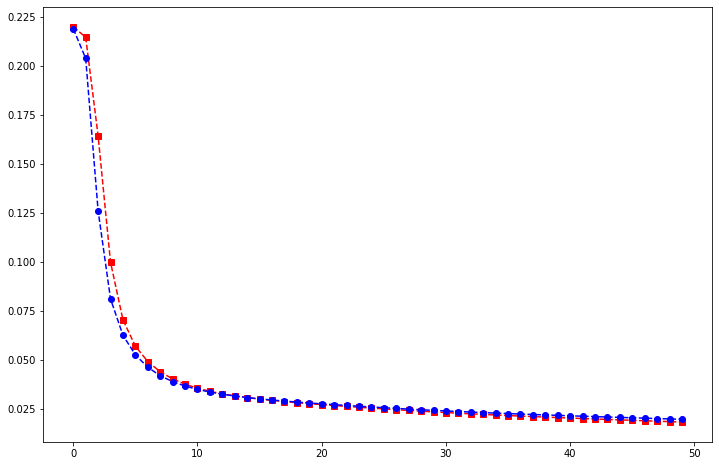

In [38]:
# Visualize the loss function for each epoch
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20

plt.plot(clf.log_loss, "rs--")
plt.plot(clf.log_loss_val, "bo--")

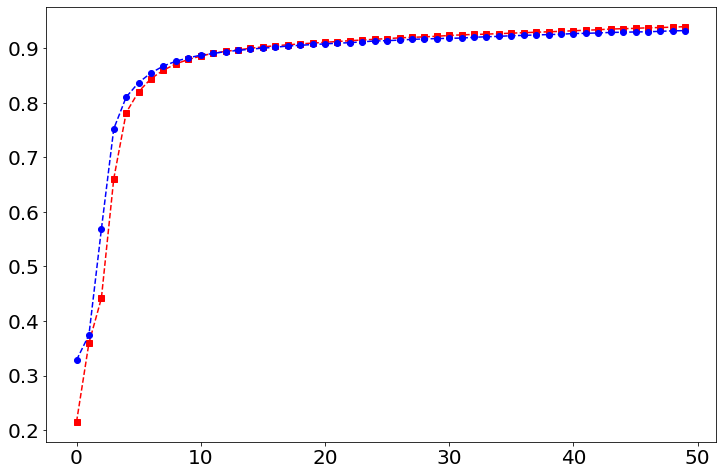

In [39]:
# Visualization of the percentage of correct answer for each epoch
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20

plt.plot(clf.log_acc, "rs--")
plt.plot(clf.log_acc_val, "bo--")

## Problem 8 (Advance assignment) Confirmation of misclassification

See what the misclassified image looked like. Take an estimate and run the code below.

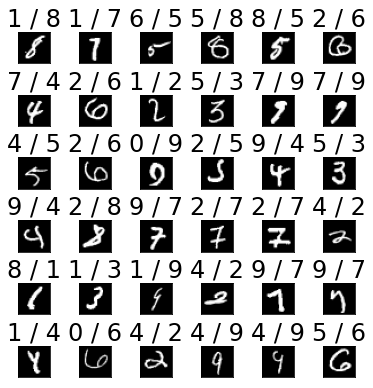

In [40]:
"""
Display word classification results side by side. The display above the image is "estimated result / correct answer".
Parameters:
----------
y_pred : Estimated ndarray (n_samples,)
y_val : Correct label of verification data (n_samples,)
X_val : Features of verification data（n_samples, n_features)
"""
import numpy as np
import matplotlib.pyplot as plt
num = 36 # How many to display

true_false = y_pred==y_val
false_list = np.where(true_false==False)[0].astype(np.int)
if false_list.shape[0] < num:
    num = false_list.shape[0]
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.set_title("{} / {}".format(y_pred[false_list[i]],y_val[false_list[i]]))
    ax.imshow(X_val.reshape(-1,28,28)[false_list[i]], cmap='gray')